In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing
%config IPCompleter.greedy=True

### Requirement:
We have the dataset **baseball_hw.csv**. This dataset contains weight and height of athletes. Here is step need to be done:
1. Read dataset.
2. Do basic analysis and visulize them.
3. In order to improve the accuracy, we need to check and standardize data. Choose which method to standardize and visualize them after.

In [3]:
dataset = pd.read_csv("data/baseball_hw.csv")
del dataset['Unnamed: 0']

In [4]:
dataset.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 2 columns):
height    1015 non-null float64
weight    1015 non-null float64
dtypes: float64(2)
memory usage: 15.9 KB


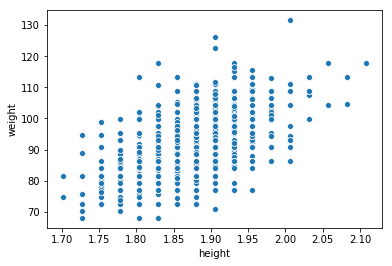

In [6]:
sb.scatterplot(dataset.height, dataset.weight)

In [7]:
def continous_analysis(data, col):
    colSer = data[col]
    mean = colSer.mean()
    mode = colSer.mode()
    median = colSer.median()
    range_ = colSer.ptp()
    std = colSer.std()
    skew = colSer.skew()
    kurtois = colSer.kurtosis()
    print("==============================")
    print(col, "Mean:", mean)
    print(col, "Mode:", mode.values)
    print(col, "Median:", median)
    print(col, "Range:", range_)
    print(col, "Std:", std)
    print(col, "Skew:", skew)
    print(col, "Kurtois:", kurtois)
    print("\n")

In [8]:
for col in dataset:
    continous_analysis(dataset, col)

height Mean: 1.8717172413793102
height Mode: [1.8796]
height Median: 1.8796
height Range: 0.4064000000000001
height Std: 0.05877387356036529
height Skew: 0.23353939068968324
height Kurtois: 0.34726831467516206


weight Mean: 91.33019058916257
weight Mode: [90.7184]
weight Median: 90.7184
weight Range: 63.50288000000002
weight Std: 9.445198250197956
weight Skew: 0.34318597598127093
weight Kurtois: 0.1784436158610947




/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


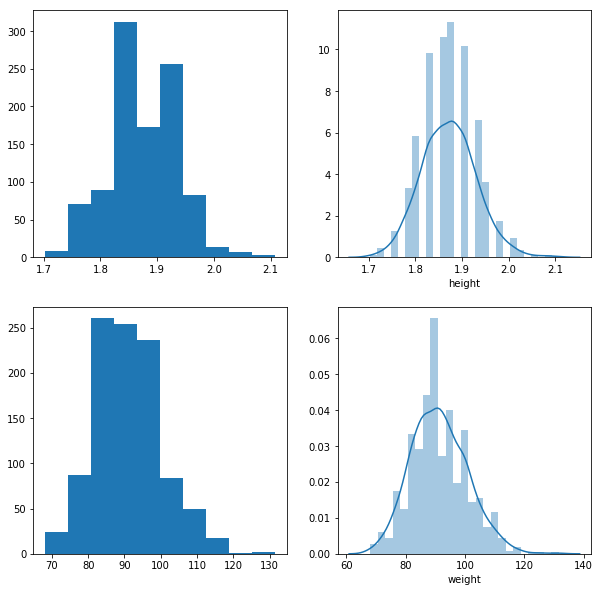

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(dataset.height)
plt.subplot(2, 2, 2)
sb.distplot(dataset.height)
plt.subplot(2, 2, 3)
plt.hist(dataset.weight)
plt.subplot(2, 2, 4)
sb.distplot(dataset.weight)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8330035a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8330042128>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83300358d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f83300427b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8330042b00>],
 'means': []}

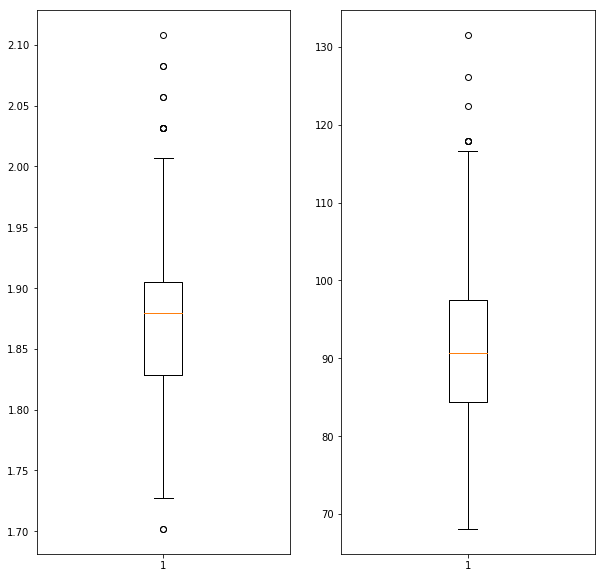

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.boxplot(dataset.height)
plt.subplot(1, 2, 2)
plt.boxplot(dataset.weight)

### Skew của Height va Weight > 0 ==> PP lệch phải
### Quan sát mean, mode, median của Height và Weight ta thấy chúng gần với pp chuẩn.
### ==> Scale bằng minmax nếu lại bỏ outlier, Scale = Bobust nếu chấp nhận outlier

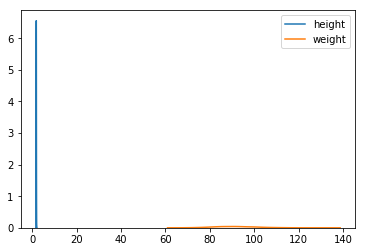

In [11]:
sb.kdeplot(dataset.height)
sb.kdeplot(dataset.weight)

### Dùng Robust Scaler

In [12]:
scaler = preprocessing.RobustScaler()
scale_data = scaler.fit_transform(dataset)
new_dataset = pd.DataFrame(scale_data, columns=["height", "weight"])

In [13]:
new_dataset.head()

,height,weight
0,0.000000,-0.689655
1,0.000000,0.517241
2,-0.666667,0.344828
3,-0.666667,0.344828
4,-0.333333,-0.413793


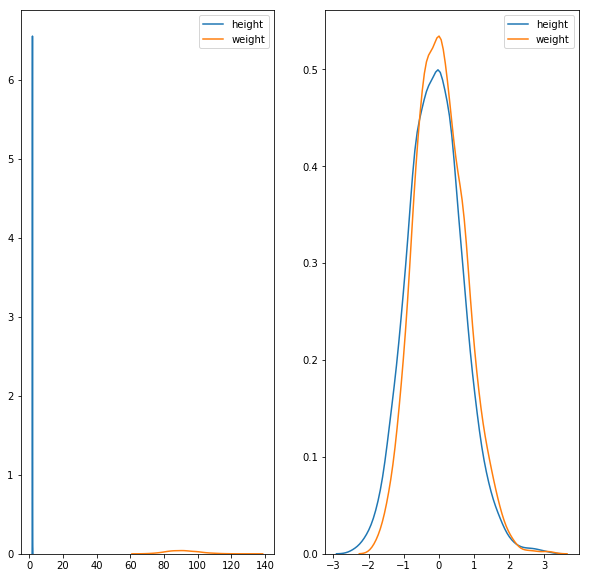

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
sb.kdeplot(dataset.height)
sb.kdeplot(dataset.weight)
plt.subplot(1,2,2)
sb.kdeplot(new_dataset.height)
sb.kdeplot(new_dataset.weight)


### We user minMax Scaler, remove outlier before apply scaler

In [15]:
height_q1 = np.percentile(dataset.height, 25)
height_q3 = np.percentile(dataset.height, 75)
height_iqr = scipy.stats.iqr(dataset.height)

In [16]:
weight_q1 = np.percentile(dataset.weight, 25)
weight_q3 = np.percentile(dataset.weight, 75)
weight_iqr = scipy.stats.iqr(dataset.weight)

In [17]:
dataset_no_outlier = dataset[(dataset.height >= height_q1 - 1.5 * height_iqr) & (dataset.height <= height_q3 + 1.5 * height_iqr)]

In [18]:
dataset_no_outlier = dataset_no_outlier[(dataset.weight >= weight_q1 - 1.5 * weight_iqr) & (dataset.weight <= weight_q3 + 1.5 * weight_iqr)]

/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [19]:
dataset_no_outlier.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


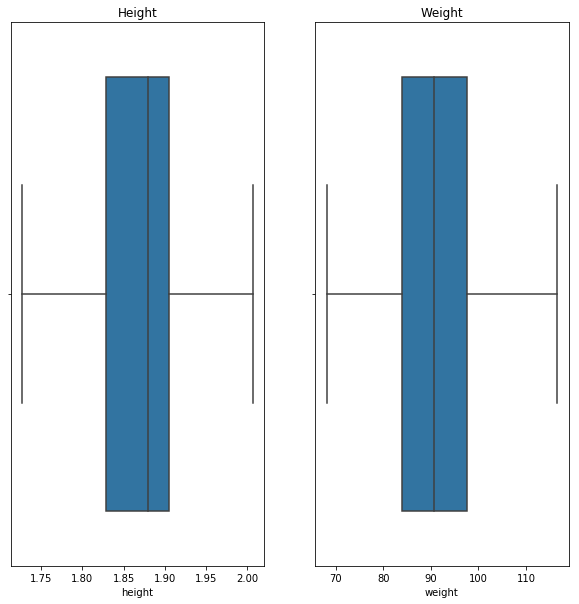

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Height")
sb.boxplot(dataset_no_outlier.height)
plt.subplot(1, 2, 2)
plt.title("Weight")
sb.boxplot(dataset_no_outlier.weight)

In [21]:
minmax_scaler = preprocessing.MinMaxScaler()
scale_data = minmax_scaler.fit_transform(dataset)
scale_dataset= pd.DataFrame(scale_data, columns=["height", "weight"])

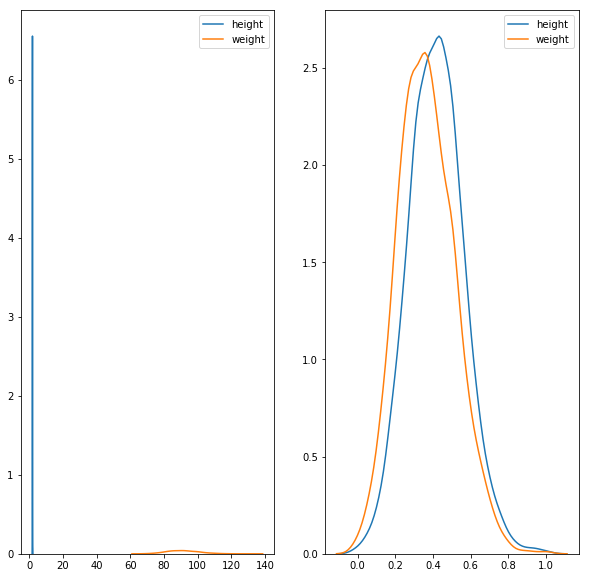

In [22]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
sb.kdeplot(dataset.height)
sb.kdeplot(dataset.weight)
plt.subplot(1,2,2)
sb.kdeplot(scale_dataset.height)
sb.kdeplot(scale_dataset.weight)